Justin Kiggins

Oct 24, 2016

[justink@alleninstitute.org](mailto:justink@alleninstitute.org)

Summary of learning on cohorts 1-3 on the Detection of Change task.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import sys
sys.path.append(r'C:\Users\justink\Code\dro')

import dro.utilities as dro
import dro.plotting_functions as dro_plots

failed to import CV2 in core.utilities


c:\users\justink\code\imaging_behavior\imaging_behavior\core\tifffile.py:278: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


failed to import mask in core.jcamdata.py
failed to import get_mask_dict_gui in core.epoch.py
FreeType import Failed: Freetype library not found
failed to import mask relalated functions in __init__.py


In [2]:
from braintv_pilot.cohorts import cohort_assignment
cohort_assignment

,cohort,day_zero,mouse_id
0,Cohort 4,2016-10-31,M272464
1,Cohort 4,2016-10-31,M271733
2,Cohort 4,2016-10-31,M271728
3,Cohort 4,2016-10-31,M276951
4,Cohort 4,2016-10-31,M276950
5,Cohort 4,2016-10-31,M276600
6,Cohort 3,2016-10-10,M272465
7,Cohort 3,2016-10-10,M265158
8,Cohort 3,2016-10-10,M271966
9,Cohort 3,2016-10-10,M265154


In [3]:
from braintv_pilot.cohorts import mouse_info
mouse_df = cohort_assignment['mouse_id'].apply(lambda mouse: pd.Series(mouse_info(mouse)))
cohort_assignment = cohort_assignment.merge(
    mouse_df,
    how='left',
    on='mouse_id',
)

In [4]:
cohort_assignment

,cohort,day_zero,mouse_id,baselineweight,birthdate,dayonescript,driver1,driver2,group,iacuc_protocol,minweight,mousenotes,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate
0,Cohort 4,2016-10-31,M272464,20.2,2016-08-24,,None,None,EMX-Cre-Ai35,1406,85,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
1,Cohort 4,2016-10-31,M271733,20.4,2016-08-01,,None,None,Nr5a1,1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
2,Cohort 4,2016-10-31,M271728,23.0,2016-08-01,,None,None,Nr5a1,1506,85,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
3,Cohort 4,2016-10-31,M276951,20.8,2016-08-27,,None,None,Emx-IRES-Cre;Ai95(NC),1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
4,Cohort 4,2016-10-31,M276950,20.4,2016-08-27,,None,None,EMX-Cre-Ai35,1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
5,Cohort 4,2016-10-31,M276600,16.6,2016-08-26,,None,None,EMX-Cre-Ai35,1506,85,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
6,Cohort 3,2016-10-10,M272465,15.7,2016-08-27,,None,None,EMX-Cre-Ai35,1506,80,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-05
7,Cohort 3,2016-10-10,M265158,20.7,2016-06-28,,None,None,Rorb-IRES2-Cre; Camk2a-tTA; Ai93 (NC),1506,80,Additional information...,sissyc,None,Female,None,None,sissyc,2016-09-30
8,Cohort 3,2016-10-10,M271966,22.0,2016-08-27,,None,None,EMX-Cre-Ai35,1506,80,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-05
9,Cohort 3,2016-10-10,M265154,27.7,2016-06-28,,None,None,Rorb-IRES2-Cre; Camk2a-tTA; Ai93 (NC),1506,80,Additional information...,sissyc,None,Male,None,None,sissyc,2016-09-30


## Load data

In [5]:
cohort_assignment.groupby('cohort')['group'].value_counts()

cohort    group                                
Cohort 1  Scnn1a-Tg3-Cre; Camk2a-tTa; Ai93 (NC)    3
          Rorb-IRES2-Cre; Camk2a-tTA; Ai93 (NC)    2
          Sim1-Cre                                 1
Cohort 2  Rasgrf                                   2
          Ai93                                     1
          Gnb4                                     1
          Rasgrf2                                  1
          Sim1-Cre                                 1
Cohort 3  Rorb-IRES2-Cre; Camk2a-tTA; Ai93 (NC)    3
          EMX-Cre-Ai35                             2
          Scnn1a-Tg3-Cre; Camk2a-tTa; Ai93 (NC)    1
Cohort 4  EMX-Cre-Ai35                             3
          Nr5a1                                    2
          Emx-IRES-Cre;Ai95(NC)                    1
Name: group, dtype: int64

In [6]:
import logging
logger = logging.getLogger(__name__)

In [7]:
from braintv_pilot.latest import copy_latest
copy_latest()

In [8]:
from braintv_pilot.latest import local_dir
df = dro.load_from_folder(local_dir)

error loading file 161107125855-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276600.pkl: 
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161118094018-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161118094405-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M272465.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161118095013-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258194.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161118101423-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276950.pkl
Loading c:\users\justink\projects\braintv_behavior_piloting\braintv_pilot\..\data\raw\161118101716-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M265154.pkl
Loading c

In [9]:
df = df.merge(
    cohort_assignment,
    how='left',
    on='mouse_id',
)

In [10]:
from braintv_pilot.cohorts import day_zero

In [11]:

def get_training_day(df_in):
    '''adds a column to the dataframe with the number of unique training days up to that point
         '''
    coh = cohort_assignment.set_index('mouse_id')['cohort']
#     print coh

    training_day_lookup = {}
    for mouse, group in df_in.groupby('mouse_id'):
        dates = np.sort(group['date'].unique())
        try:
            dz = day_zero[coh[mouse]]
            offset = np.argwhere(dates==dz)[0][0]
        except KeyError:
            print 'day zero not found for {}'.format(mouse)
            offset = 0
        except IndexError:
            print 'day zero ({}) not found in dates'.format(dz)
            offset = 0
        print offset
        training_day_lookup[mouse] = {date:training_day-offset for training_day,date in enumerate(dates)}
        print mouse,dates
    return df_in.apply(lambda row: training_day_lookup[row['mouse_id']][row['date']],axis=1)

df['training_day'] = get_training_day(df)

#df['day_of_week'] = df.startdatetime.dt.weekday_name

## build arrays for change detection

# df['change'] = ~df['change_frame'].isnull()
df['change'] = df['trial_type']=='go'
df['detect'] = df['response']==1.0

## calculate reaction times

df['reaction_time'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else np.nan)
df['reaction_time'] = df.apply(lambda row: row['reaction_time'] - row['change_time'],axis=1)

## unwrap the response window
df['response_window_lower'] = df['response_window'].map(lambda x: x[0])
df['response_window_upper'] = df['response_window'].map(lambda x: x[1])


0
M246782 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
0
M249123 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
0
M250783 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20'
 '2016-09-21' '2016-09-22' '2016-09-23' '2016-09-26' '2016-09-27'
 '2016-09-28' '2016-09-29' '2016-09-30' '2016-10-03' '2016-10-05'
 '2016-10-06' '2016-10-07' '2016-10-10' '2016-10-11' '201

In [12]:
from behaviorist import metrics
from sklearn.metrics import accuracy_score

In [13]:
def compute_metrics(group):
    result = {
        'accuracy': metrics.discrim(group,'change','detect',metric=accuracy_score),
        'd-prime': metrics.discrim(group,'change','detect',metric=metrics.d_prime),
        'discrim_p': metrics.discrim(group,'change','detect',metric=metrics.discrim_p),
        'response_bias': metrics.response_bias(group,'detect'),
        'earned_water': metrics.earned_water(group), 
        'total_water': metrics.total_water(group), 
        'num_trials': metrics.num_trials(group),
        'num_contingent_trials': metrics.num_contingent_trials(group),
        'reaction_time_50th%ile': metrics.reaction_times(group,percentile=50),
        'reaction_time_05th%ile': metrics.reaction_times(group,percentile=5),
        'reaction_time_95th%ile': metrics.reaction_times(group,percentile=95),
    }
    
    return pd.Series(result, name='metrics')

water = df.groupby(['cohort','mouse_id','training_day']).apply(compute_metrics).reset_index()
water['frac_earned_water'] = water['earned_water'] / water['total_water']
water['reaction_time_spread'] = water['reaction_time_95th%ile'] - water['reaction_time_05th%ile']
water.head()

c:\users\justink\code\behaviorist\behaviorist\metrics.py:90: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return behav_df[mask][(behav_df['reward_times'].map(len)>0)]['reward_volume'].sum()


metrics,cohort,mouse_id,training_day,accuracy,d-prime,discrim_p,earned_water,num_contingent_trials,num_trials,reaction_time_05th%ile,reaction_time_50th%ile,reaction_time_95th%ile,response_bias,total_water,frac_earned_water,reaction_time_spread
0,Cohort 1,M246782,0,0.544872,NaN,1.000000,1.092,156.0,157.0,-5.020008,0.334217,3.778943,0.544872,1.092,1.0,8.798951
1,Cohort 1,M246782,1,0.219101,-0.057545,0.946458,0.354,356.0,1563.0,0.161557,1.286406,4.141207,0.171348,0.354,1.0,3.979650
2,Cohort 1,M246782,2,0.264957,-0.803594,0.076643,0.198,117.0,394.0,0.208261,1.360493,5.292036,0.273504,0.198,1.0,5.083775
3,Cohort 1,M246782,3,0.241935,-0.025337,0.783441,0.276,186.0,426.0,0.087997,1.401724,4.474582,0.193548,0.276,1.0,4.386585
4,Cohort 1,M246782,4,0.312849,-0.262469,0.681377,0.530,179.0,423.0,0.150696,1.343656,4.549200,0.296089,0.530,1.0,4.398504


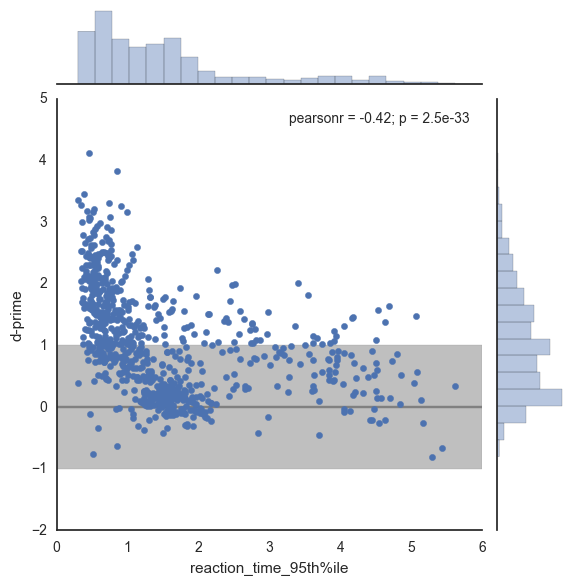

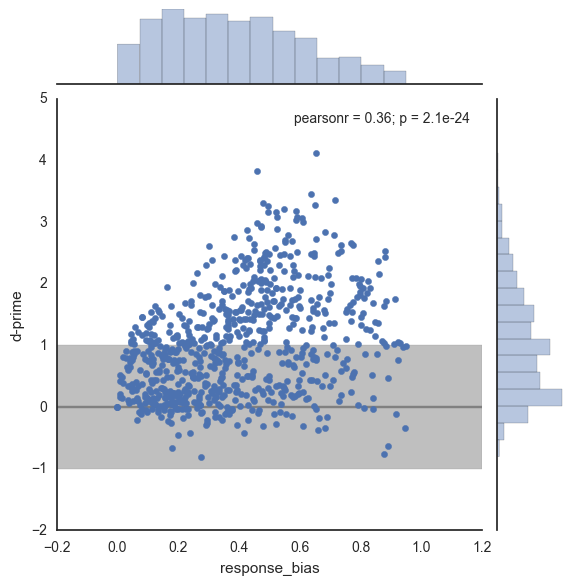

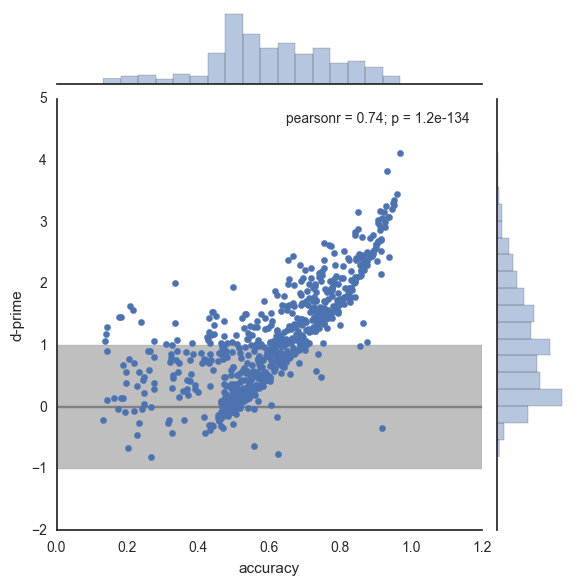

In [14]:
jp = sns.jointplot('reaction_time_95th%ile','d-prime',data=water,
             )
jp.ax_joint.axhspan(-1,1,color='0.5',alpha=0.5,zorder=-2)
jp.ax_joint.axhline(0.0,color='0.5',zorder=-1)

jp = sns.jointplot('response_bias','d-prime',data=water,
             )
jp.ax_joint.axhspan(-1,1,color='0.5',alpha=0.5,zorder=-2)
jp.ax_joint.axhline(0.0,color='0.5',zorder=-1)


jp = sns.jointplot('accuracy','d-prime',data=water,
             )
jp.ax_joint.axhspan(-1,1,color='0.5',alpha=0.5,zorder=-2)
jp.ax_joint.axhline(0.0,color='0.5',zorder=-1)

In [15]:
def stars(p,ns='n.s.',thresh=(0.1,0.05,0.01,0.001)):
    '''Converts p-values into R-styled stars.
    Signif. codes:
        '***' :  < 0.001
        '**' : < 0.01
        '*' : < 0.05
        '.' : < 0.1
        'n.s.' : < 1.0
    '''
    lookup = (
        (0.001, '***'),
        (0.01, '**'),
        (0.05, '*'),
        (0.1, '.'),
    )
    for t,s in lookup:
        if (t in thresh) and (p < t):
            return s
    return ns

def plot_stars(p,x,y,ax,ns='n.s.',thresh=(0.1,0.05,0.01,0.001),size='large',horizontalalignment='center',**kwargs):
    ''' Plots significance stars '''
    ax.text(x,y,stars(p,ns,thresh),size=size,horizontalalignment=horizontalalignment,**kwargs)

def plot_linestar(p,x1,x2,y,ax):
    ax.hlines(y, x1, x2)
    plot_stars(0.5*(x1+x2),y+0.02,stars(p),ax=ax,size='large',horizontalalignment='center')

In [16]:
class RisingEdge():
    """
    This object implements a "rising edge" detector on a boolean array.
    
    It takes advantage of how pandas applies functions in order.
    
    For example, if the "criteria" column in the `df` dataframe consists of booleans indicating
    whether the row meets a criterion, we can detect the first run of three rows above criterion
    with the following
    
        first_run_of_three = (
            df['criteria']
            .rolling(center=False,window=3)
            .apply(func=RisingEdge().check)
            )
    
    ```
    
    """
    def __init__(self):
        self.firstall = False
    def check(self,arr):
        if arr.all():
            self.firstall = True
        return self.firstall

In [17]:
pdf = water
pdf['d_prime'] = pdf['d-prime']
pdf['stimulus_control'] = pdf['discrim_p'] < 0.01

In [18]:

num_tr_thresh = 20
dprime_thresh = 0.5

consecutive_sessions = 2

pdf['criteria'] = (
    pdf['stimulus_control']
    & (pdf['num_contingent_trials'] > num_tr_thresh)
    & (pdf['d_prime'] > dprime_thresh)
)

mask = pdf.num_trials > num_tr_thresh # ignore sessions with very few trials

first = {}

for key, group in pdf[mask].set_index('training_day').sort_index().groupby(['cohort','mouse_id']):
#     print group.head()
    learned = (
        group['criteria']
        .rolling(center=False,window=consecutive_sessions)
        .apply(func=RisingEdge().check)
        )
    summary = pd.DataFrame(
        [learned.rename('learned'),
         group['stimulus_control'],
         group['d_prime'],
         group['num_trials'],
        ]).transpose()
    
    try:
        first_session = summary['learned'][summary['learned']==1.0].index[0] +(1-consecutive_sessions)
    except IndexError:
        first_session = np.nan
    
    print key, first_session
#     print summary.tail()
    
    first[key[1]]=first_session
    
def learned(row):
    first_day = first[row['mouse_id']]
    
    if pd.isnull(first_day):
        return False
    else: 
        return (first_day <= row['training_day'])
    
pdf['learned'] = pdf.apply(learned,axis=1)

('Cohort 1', 'M246782') 18
('Cohort 1', 'M249123') nan
('Cohort 1', 'M250783') 8
('Cohort 1', 'M250786') 8
('Cohort 1', 'M258174') 3
('Cohort 1', 'M258196') 7
('Cohort 2', 'M258089') 10
('Cohort 2', 'M258173') 21
('Cohort 2', 'M258274') 4
('Cohort 2', 'M258275') 7
('Cohort 2', 'M258276') 36
('Cohort 2', 'M261584') 9
('Cohort 3', 'M258194') 5
('Cohort 3', 'M265154') nan
('Cohort 3', 'M265158') 24
('Cohort 3', 'M265166') nan
('Cohort 3', 'M271966') 10
('Cohort 3', 'M272465') 11
('Cohort 4', 'M271728') 4
('Cohort 4', 'M271733') 9
('Cohort 4', 'M272464') 5
('Cohort 4', 'M276600') 3
('Cohort 4', 'M276950') 5
('Cohort 4', 'M276951') 3


In [19]:
df[df.cohort=='Cohort 4'].groupby(['mouse_id'])['training_day'].unique()

mouse_id
M271728        [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
M271733        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
M272464            [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
M276600            [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
M276950    [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
M276951    [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Name: training_day, dtype: object

In [20]:
df[df.cohort=='Cohort 3'].groupby(['mouse_id'])['date'].min()

mouse_id
M258194    2016-10-10
M265154    2016-10-10
M265158    2016-10-10
M265166    2016-10-10
M271966    2016-10-10
M272465    2016-10-10
Name: date, dtype: object

In [21]:
df.columns

Index([u'LDT_mode', u'auto_rewarded', u'blank_duration_range',
       u'blank_screen_timeout', u'change_color', u'change_contrast',
       u'change_frame', u'change_image', u'change_ori', u'change_size',
       u'change_time', u'color', u'computer_name', u'cumulative_volume',
       u'date', u'day', u'dayofweek', u'delta_ori', u'distribution_mean',
       u'endframe', u'filename', u'filepath', u'hour', u'index',
       u'inital_color', u'inital_contrast', u'initial_contrast',
       u'initial_image', u'initial_ori', u'initial_size', u'lick_frames',
       u'lick_times', u'month', u'mouse_id', u'number_of_rewards',
       u'optogenetics', u'prechange_minimum', u'response', u'response_latency',
       u'response_time', u'response_type', u'response_window',
       u'reward_frames', u'reward_times', u'reward_volume', u'rewarded',
       u'rig_id', u'scheduled_change_time', u'session_duration',
       u'startdatetime', u'startframe', u'starttime', u'stim_duration',
       u'stim_on_frames',

In [22]:
df[df.cohort=='Cohort 4'].groupby('date').get_group('2016-10-28')['auto_rewarded'].mean()

1.0

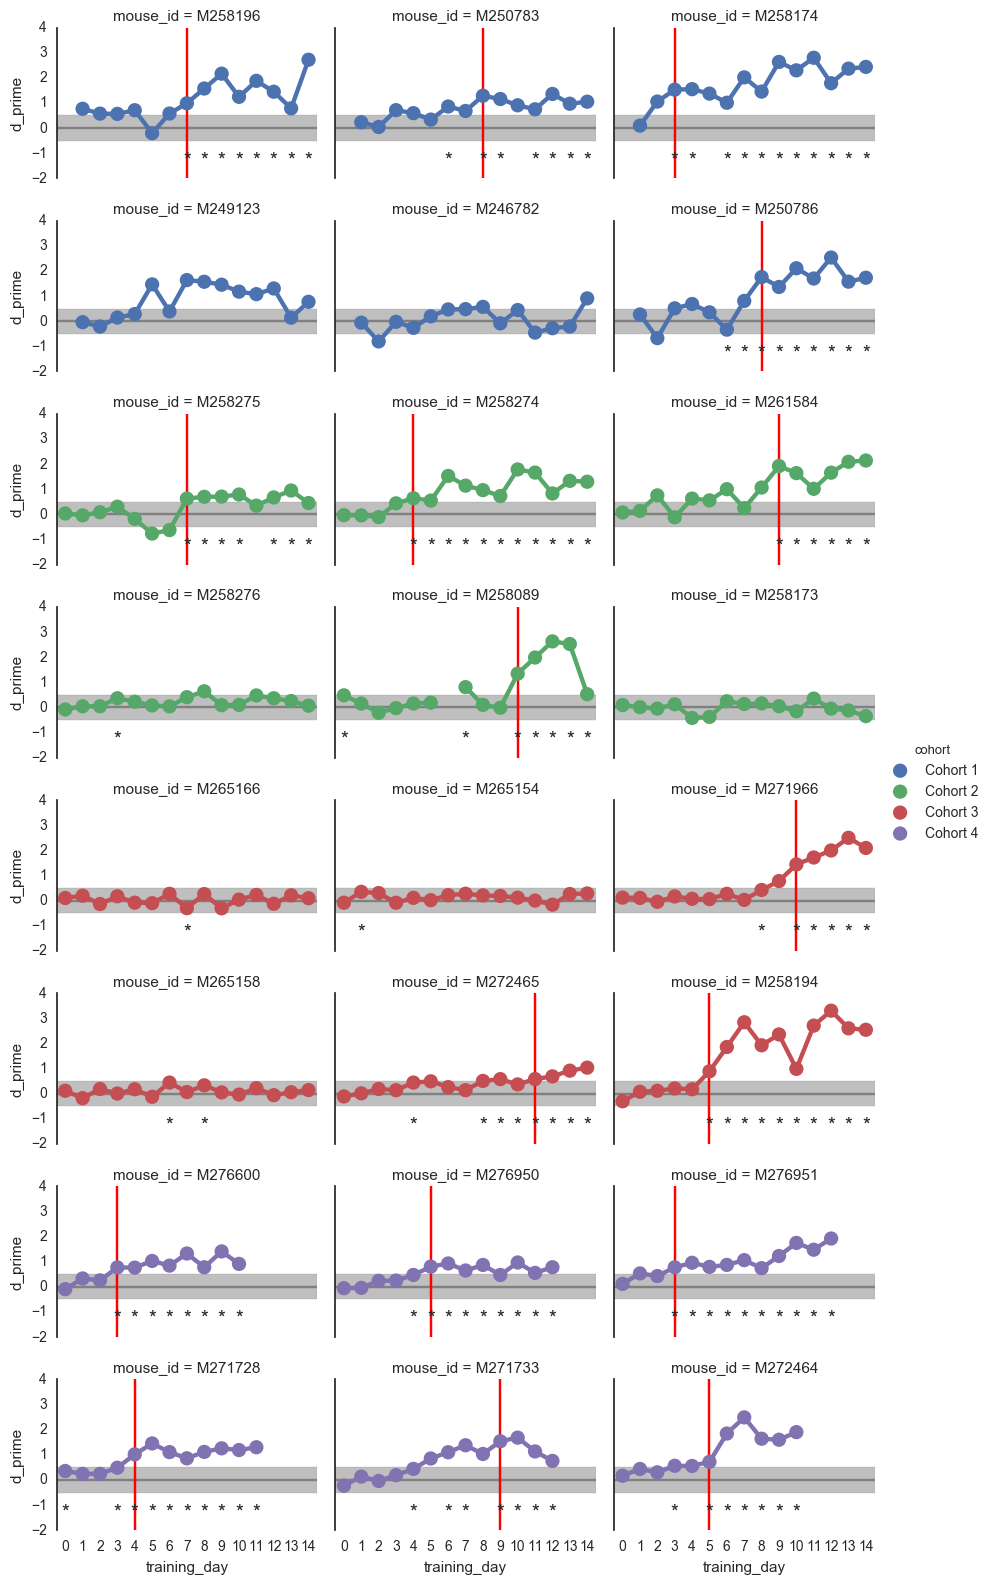

In [23]:
col_order = cohort_assignment.sort_values('cohort')['mouse_id']

mask = (
    (pdf.training_day >= 0)
    & (pdf.training_day < 15)
    )

fp = sns.factorplot('training_day','d_prime',data=pdf[mask],
                    col='mouse_id',
                    col_wrap=3,
                    size=2,
                    aspect=1.5,
                    hue='cohort',
                    col_order=col_order,
              )

yloc = -1.5

for ax,mouse_id in zip(fp.axes.ravel(),col_order):
    ax.axhline(0.0,color='0.5',zorder=-1)
    ax.axhspan(-dprime_thresh,dprime_thresh,color='0.5',alpha=0.5,zorder=-1)
#     print mouse_id
    for r,row in pdf[mask & (pdf['mouse_id']==mouse_id)].iterrows():
        p, x = row['discrim_p'], row['training_day']
        plot_stars(p,x,yloc,ax,ns='',thresh=(0.05,))
    ax.axvline(first[mouse_id],color='r',zorder=-1)
    
sns.despine(bottom=True)
# plt.xlim(0,8)

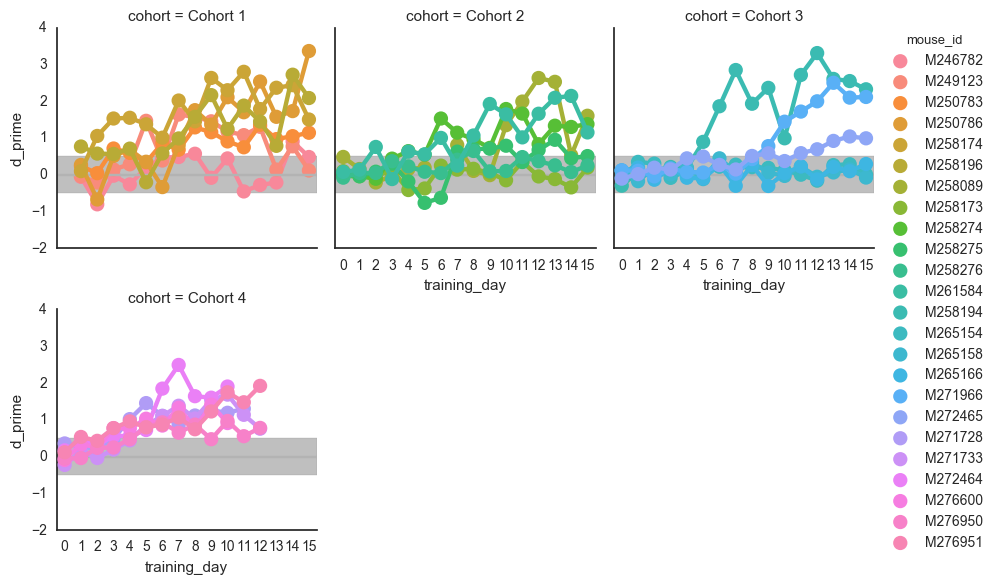

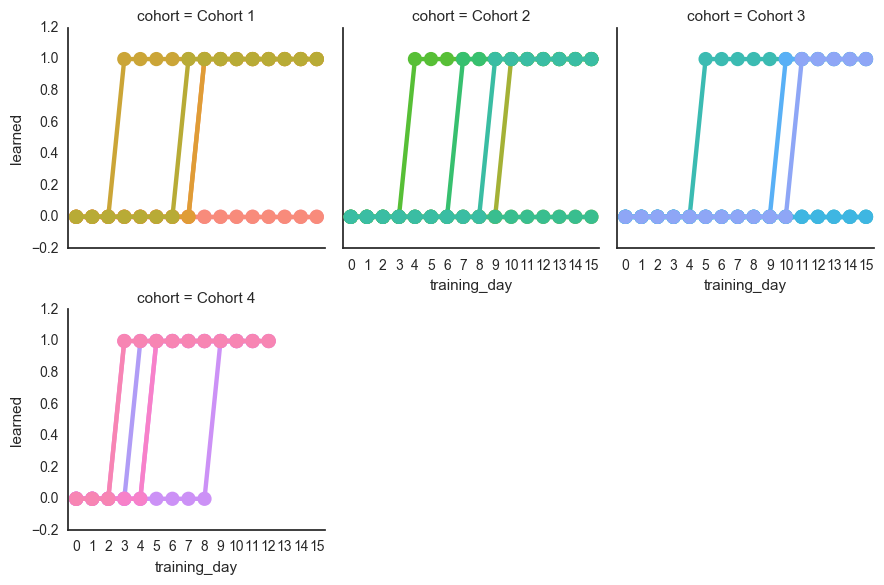

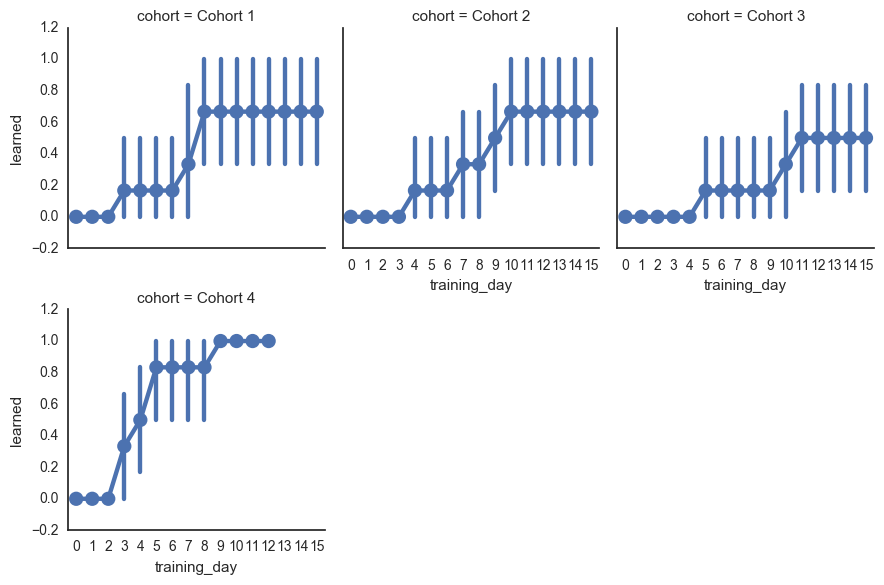

In [24]:
mask = (
#     (pdf.num_trials > num_tr_thresh) # ignore sessions with very few trials
#     & (pdf.training_day <= pdf.groupby('mouse_id')['training_day'].max().min())
    (pdf.training_day >= 0)
    & (pdf.training_day <= 15)
    )

fp = sns.factorplot('training_day','d_prime',data=pdf[mask],
                    hue='mouse_id',
                    col_wrap=3,
                    size=3,
#                     aspect=2,
                    col='cohort',
#                     col_order=col_order,
              )

for ax in fp.axes.flatten():
    ax.axhline(0.0,color='0.7')
    ax.axhspan(-0.5,0.5,color='0.5',alpha=0.5,zorder=-10)

fp = sns.factorplot('training_day','learned',data=pdf[mask],
                    hue='mouse_id',
                    col_wrap=3,
                    size=3,
#                     aspect=2,
                    col='cohort',
#                     col_order=col_order,
                    legend=False,
              )

fp = sns.factorplot('training_day','learned',data=pdf[mask],
#                     hue='mouse_id',
                    col_wrap=3,
                    size=3,
#                     aspect=2,
                    col='cohort',
#                     col_order=col_order,
                    legend=False,
              )

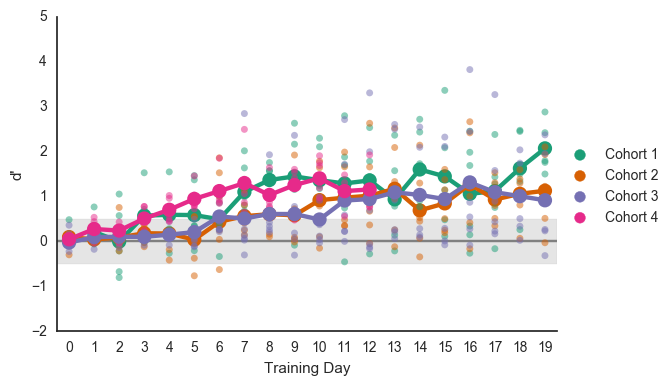

In [25]:
mask = (
#     (pdf.num_trials > num_tr_thresh) # ignore sessions with very few trials
#     & (pdf.training_day <= pdf.groupby('mouse_id')['training_day'].max().min())
    (pdf.training_day >= 0)
    & (pdf.training_day <= 19)
)

g = sns.factorplot('training_day','d_prime',data=pdf[mask],
                    aspect=1.2,
                    hue='cohort',
                    kind='strip',  
                    legend=True,
                    alpha=0.5,
                    palette='Dark2'
              )

g.map_dataframe(sns.pointplot,'training_day','d_prime',
                hue='cohort',
                palette='Dark2',
                zorder=1000,
                ci=None,
                )
g.set_axis_labels('Training Day', 'd\'')
g.fig.get_children()[-1].set_bbox_to_anchor((1.15, 0.5, 0, 0))
g.fig.get_children()[-1].set_title('')


for ax in g.axes.ravel():
    ax.axhline(0.0,color='0.5',zorder=-10)
    ax.axhspan(-0.5,0.5,color='0.5',alpha=0.2,zorder=-10)
    